### Parameter estimation using MCMC
- _(5 Points)_ Use the best mixing version you found from the code from assignment 7 to produce a large number of independent samples from the scaled/shifted student-t distribution with $\nu=3, \mu=1.5$ and $\sigma=1$. In this case, the samples $\{x_i\}$ are the data, $d$, and the model parameters are $\nu, \mu$ and $\sigma$. the goal of this HW is to infer the parameters $\nu, \mu$ and $\sigma$ that produce the data 

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.special import gamma

%matplotlib inline

In [11]:
v = 3
o = 1
u = 1.5
f = lambda x,v,o,u:gamma((v + 1)/2) / (gamma(v/2) * o*(v*np.pi)**0.5) * (1 + 1/v * ((x-u)/o)**2 )**(-(v+1)/2)

def mcmc(a,n, x_0, v, o, u):
    accept = 0
    x = np.zeros(n)
    x[0] = x_0
    
    for i in range(0, n-1):
        y_s = np.random.normal(x[i], a)

        if np.random.rand() < min(1, f(y_s, v, o, u)/f(x[i], v, o, u)):
            x[i+1] = y_s
            accept += 1
        else:
            x[i+1] = x[i]        
    return x, accept

In [12]:
x_0 = 0
alpha = 0.2
N=1000
chain, accept = mcmc(alpha, N, x_0, v, o, u)

- _(25 Points)_ Write a MCMC to explore the produce the posterior distribution functions for these parameters. The likelihood is given by.

$$p(d|\nu,\sigma,\mu) = \prod_{i=1}^N \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)\sqrt{\nu \pi} \sigma} \left(1 + \frac{1}{\nu} \left(\frac{x_i - \mu}{\sigma}\right)^2\right)^{-\frac{\nu + 1}{2}}.$$

Take the priors to be uniform in the ranges $\nu \in [0.1, 10], \mu \in [-5, 5]$ and $\sigma \in [0.1, 10]$. For the proposal distribution use a multi-variate Gaussian.

In [53]:
def l(d, v, o, u):
    result = 1
    k_1 = gamma((v+1)/2) / (gamma(v/2) * o*(v*np.pi)**0.5)
    for x_i in d:
        result *= k_1 * (1 + (1/v)*((x_i*u)/o)**2)**(-(v+1)/2)
    return result

def multi_mcmc(alpha, n, v_0, o_0, u_0, chain):
    v_chain=np.zeros(n)
    o_chain=np.zeros(n)
    u_chain=np.zeros(n)
    
    accept = 0
    
    v_chain[0] = v_0
    o_chain[0] = o_0
    u_chain[0] = u_0
    
    for i in range(0, n-1):
        v_s = np.random.normal(v_chain[i], alpha[0])
        o_s = np.random.normal(o_chain[i], alpha[1])
        u_s = np.random.normal(u_chain[i], alpha[2])
        
        if 0.1 < v_s <= 10 and 0.1 < o_s<= 10 and -5 < u_s <= 5:
            if np.random.rand() < min(1, l(chain, v_s, o_s, u_s)/l(chain, v_chain[i], o_chain[i], u_chain[i])):
                v_chain[i+1] = v_s
                o_chain[i+1] = o_s
                u_chain[i+1] = u_s
                accept += 1
            else:
                v_chain[i+1] = v_chain[i]
                o_chain[i+1] = o_chain[i]
                u_chain[i+1] = u_chain[i]
    
    return v_chain, o_chain, u_chain, accept

In [66]:
v_0 = 7
o_0 = 5
u_0 = -1
#v = 3
#o = 1
#u = 1.5
alpha=[1, 1, 0.3]
v_chain, o_chain, u_chain, accept = multi_mcmc(alpha, 1000, v_0, o_0, u_0, chain)
#v_chain = o_chain = u_chain = None

<ipython-input-53-7f23a34d50c4>:25: RuntimeWarning: invalid value encountered in double_scalars
  if np.random.rand() < min(1, l(chain, v_s, o_s, u_s)/l(chain, v_chain[i], o_chain[i], u_chain[i])):
<ipython-input-53-7f23a34d50c4>:3: RuntimeWarning: invalid value encountered in double_scalars
  k_1 = gamma((v+1)/2) / (gamma(v/2) * o*(v*np.pi)**0.5)
<ipython-input-53-7f23a34d50c4>:5: RuntimeWarning: divide by zero encountered in double_scalars
  result *= k_1 * (1 + (1/v)*((x_i*u)/o)**2)**(-(v+1)/2)
<ipython-input-53-7f23a34d50c4>:5: RuntimeWarning: invalid value encountered in double_scalars
  result *= k_1 * (1 + (1/v)*((x_i*u)/o)**2)**(-(v+1)/2)
<ipython-input-53-7f23a34d50c4>:25: RuntimeWarning: divide by zero encountered in double_scalars
  if np.random.rand() < min(1, l(chain, v_s, o_s, u_s)/l(chain, v_chain[i], o_chain[i], u_chain[i])):


- For $N=100$ and $N=1000$ data samples, and always make sure that the posterior distribution parameters recover the prior on the parameters
 - _(10 Points)_ Produce marginalized posterior distribution functions for the parameters

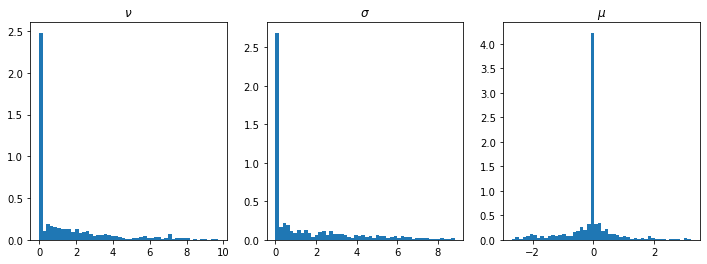

Estimates: nu= 1.4697388247490406 sigma= 1.5159771312003145 mu= -0.10543628888861736


In [67]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(v_chain, density=True, bins=50)
plt.title(r'$\nu$')
plt.subplot(132)
plt.hist(o_chain, density=True, bins=50)
plt.title(r'$\sigma$')
plt.subplot(133)
plt.hist(u_chain, density=True, bins=50)
plt.title(r'$\mu$')plt.show()
print('Estimates: nu=',np.mean(v_chain),'sigma=',np.mean(o_chain),r'mu=',np.mean(u_chain))

 - _(10 Points)_ Look at 2-d scatter plots of $\nu$ versus $\sigma$, etc to get a sense of the parameter correlations.

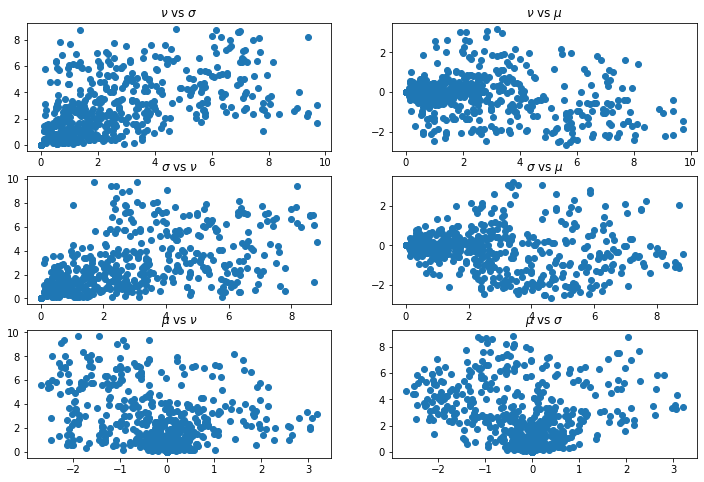

In [68]:
plt.figure(figsize=(12, 8))

plt.subplot(321)
plt.scatter(v_chain, o_chain)
plt.title(r'$\nu$ vs $\sigma$')

plt.subplot(322)
plt.scatter(v_chain, u_chain)
plt.title(r'$\nu$ vs $\mu$')

plt.subplot(323)
plt.scatter(o_chain, v_chain)
plt.title(r'$\sigma$ vs $\nu$')

plt.subplot(324)
plt.scatter(o_chain, u_chain)
plt.title(r'$\sigma$ vs $\mu$')

plt.subplot(325)
plt.scatter(u_chain, v_chain)
plt.title(r'$\mu$ vs $\nu$')

plt.subplot(326)
plt.scatter(u_chain, o_chain)
plt.title(r'$\mu$ vs $\sigma$')

plt.show()

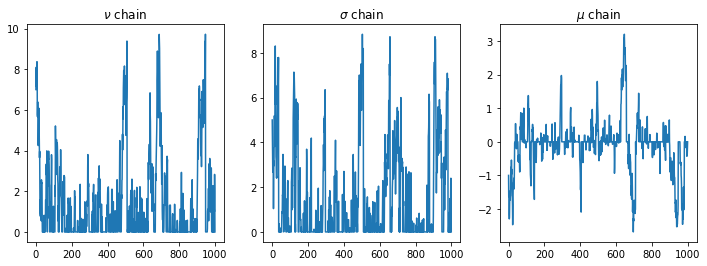

In [69]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(v_chain)
plt.title(r'$\nu$ chain')
plt.subplot(132)
plt.plot(o_chain)
plt.title(r'$\sigma$ chain')
plt.subplot(133)
plt.plot(u_chain)
plt.title(r'$\mu$ chain')

plt.show()